In [1]:
# September 2021

# Нейронные сети

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Введение

В этой главе мы переходим к нейронным сетям. Для многих Data Science ассоциируется именно с нейронными сетями и глубоким обучением. Конечно, это недостаточно верная точка зрения. Однако здесь этого обсуждать не будем. Стоит лишь помнить, что нейронные сети и глубокое обучение (далее просто будем говорить - глубокое обучение) вырастают из тех методов и концепций, которые были заложены выше, в предыдущих главах.

Усвоение концепций глубокого обучения может быть затруднено. Поэтому здесь можно предложить следующий подход: вернуться к логистической регрессии (глава 3) и в сравнении с логистической регрессией посмотреть на один из алгоритмов нейронных сетей. За основу возьмемем алгоритм Adaline, хорошо описанный в книге С. Рашки, В. Мирджалили Python и машинное обучение.

Итак, в логистичекой регрессии у нас были следующие элементы:

1) линейная функция, которая содержала сумму признаков, умноженных на коэффициенты;
2) функция распределения, через которую мы настраивали коэффициенты линейной функции;
3) логистическая функция, в которую входила линейная функция с уже настроенными весами и которая позволяла предсказать категорию (1 или 0).

А теперь давайте посмотрим на адаптивный линейный нейрон (Adaline). Этот нейрон содержит следующие элементы:

1) входные значения, то есть просто признаки по каждому наблюдению. Если представить линейную функцию, то входными значениями будут иксы;

2) входные значения умножаются на весовые коэффициенты и передаются в функцию общего входа. Так мы получаем линейную функцию;

3) затем применяется функция активации. В логистической регрессии на этом месте стоит функция распределения. То есть мы передаем нашу линейную функцию в другую функцию, которая позволяет настраивать коэффициенты;

4) далее единичная ступенчатая функция. В логистической регрессии на этом месте стоит логистическая функция, то есть такая функция, которая должна выдать нам результат - предсказанный класс.

Оптимизация осуществляется с помощью градиентного спуска, что позволяет обновлять весовые коэффициенты. 

Веса обновляются одновременно после каждой эпохи.

Многослойный персептрон предполагает наличие множества нейронов. Минимальный дизайн: один входной слой, один скрытый слой и один выходной слой. Если в сети более одного скрытого слоя, то мы говорим о глубокой искусственной нейронной сети.

Для применения нейронных сетей строго рекомендуется применение шкалирования.

Этапы применения нейронной сети следующие:

1) сначала задаем обработку данных и слои нейронной сети;

2) затем компилируем, задаем способ оптимизации, метрики;

3) обучаем;

4) делаем предсказания.

Рекомендуемая литература:

1) Себастьян Рашка, Вахид Мирджалили. Машинное обучение. 3-е издание (обязательно именно третье, не второе и не третье)
2) Орельен Жерон. Прикладное машинное обучение

Рекомендуемые книги по математике см. [здесь](https://medium.com/data-science-with-ruslan-nazarov/книги-по-data-science-и-математике-для-начинающих-6257214d82d7)

Рекомендуемые онлайн-ресурсы и прочее:
1) официальный учебник по tensorflow [здесь](https://www.tensorflow.org/tutorials)

N.B. Если где-то по тексту есть ссылка на онлайн-ресурс, то она также повторяется здесь.

Дополнительный полезный код, который может быть применен в том числе к задаче предварительной подготовке данных, можно также найти в главе 7.

# Базовые операции

In [3]:
# тензор ранга 0

rank_0_tensor = tf.constant(4)
print(rank_0_tensor)

tf.Tensor(4, shape=(), dtype=int32)


In [4]:
# тензор ранга 1

rank_1_tensor = tf.constant([0, 1, 1, 2, 3, 5, 8, 13, 21, 34])
print(rank_1_tensor.numpy())

[ 0  1  1  2  3  5  8 13 21 34]


In [5]:
# сложение тензоров

a = tf.constant([[1, 2], [3,4]])
b = tf.constant([[1, 1], [1, 1]])

print(tf.add(a, b), "\n")

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 



In [6]:
c = tf.constant([[4.0, 5.0], [10.0, 1.0]])
print(tf.reduce_max(c))

tf.Tensor(10.0, shape=(), dtype=float32)


In [7]:
rank_4_tensor = tf.zeros([3, 2, 4,5])
rank_4_tensor

<tf.Tensor: shape=(3, 2, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

Здесь [3, 2, 4, 5] каждый элемент - это размер оси, всего осей 4, поэтому ранг тензора равен 4. В этом тензоре мы имеем по вертикали 3 блока. Каждый блок в 2 строки и 4 стобца. Глубина кажого блока равна 5. 

In [8]:
# описание тензора ранга 4

print("Type of every element:", rank_4_tensor.dtype)
print("Number of axes:", rank_4_tensor.ndim)
print("Shape of tensor:", rank_4_tensor.shape)
print("Elements along axis 0 of tensor:", rank_4_tensor.shape[0])
print("Elements along the last axis of tensor:", rank_4_tensor.shape[-1])
print("Total number of elements (3*2*4*5): ", tf.size(rank_4_tensor).numpy())

Type of every element: <dtype: 'float32'>
Number of axes: 4
Shape of tensor: (3, 2, 4, 5)
Elements along axis 0 of tensor: 3
Elements along the last axis of tensor: 5
Total number of elements (3*2*4*5):  120


In [9]:
x1 = tf.constant([[1], [2], [3]])
print("Type of every element:", x1.dtype)
print("Number of axes:", x1.ndim)
print("Shape of tensor:", x1.shape)
print("Elements along axis 0 of tensor:", x1.shape[0])
print("Elements along the last axis of tensor:", x1.shape[-1])
print("Total number of elements: ", tf.size(x1).numpy())

Type of every element: <dtype: 'int32'>
Number of axes: 2
Shape of tensor: (3, 1)
Elements along axis 0 of tensor: 3
Elements along the last axis of tensor: 1
Total number of elements:  3


# Примеры из учебника

Так как построение нейронных сетей может представлять сложность для понимания, мы сначала рассмотрим примеры из официального учебника, а затем уже перейдем к работе с нашими данными. Примеров будет три: на изображение, на текст и на регрессию. Примеры для этого раздела взяты из официального учебника [отсюда](https://www.tensorflow.org/tutorials/keras/classification).

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

## Нейронная сеть для изображений

### Пример на данных Fashion

In [11]:
# загружаем данные

fashion_mnist = tf.keras.datasets.fashion_mnist

# делим на тренировочный и тестовый наборы

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Наши наборы данных состоят из изображений предметом одежды размером 28 на 28 пикселей каждое. Каждый пиксель представлен числом в диапазоне от 0 до 255.

В исходных данных даны только классы предметов одежды, без текстового описания. Поэтому ниже сохраним такое описание.

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [13]:
# размерность тренировочного набора

train_images.shape

(60000, 28, 28)

In [14]:
# количество меток тренировочного набора

len(train_labels)

60000

### Предварительная подготовка данных

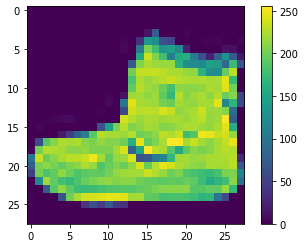

In [15]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Как указывалось выше, каждый пикспель попадает в диапазон от 0 до 255, что мы и видим на графике выше. Теперь преобразуем значения так, чтобы они лежали в интервале от 0 до 1. Для этого необходимо поделить значение каждого пикселя на 255.

In [16]:
train_images = train_images / 255.0

test_images = test_images / 255.0

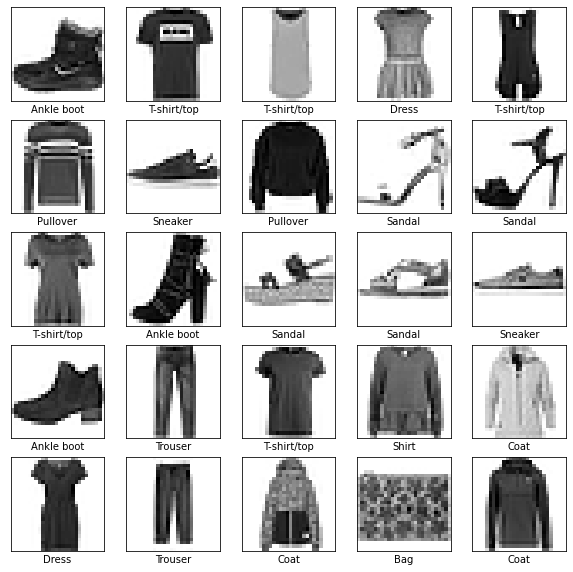

In [17]:
# проверка результатов масштабирования

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Настройка модели

In [18]:
# задаем слои

model = tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
    
])

Нейронные сети состоят из слоев. В данном случае мы имеем три слоя. 

Первый слой преобразует двумерные данные (28 на 28) в одномерные.

Второй слой - это первый полносвязный слой, который содержит 128 узлов. 

Третий слой - это второй полносвязный слой, который содержит только 10 узлов. 

In [19]:
# компилируем модель

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

На этапе компиляции мы указываем:

1) как оптимизировать модель;

2) какую функцию потерь использовать;

3) какую метрику использовать для оценки модели.

In [20]:
# тренируем модель
# ограничимся только двумя эпохами

model.fit(train_images, train_labels, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5015 - accuracy: 0.8220
Epoch 2/2
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3743 - accuracy: 0.8646


In [21]:
# оцениваем модель

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3953 - accuracy: 0.8587

Test accuracy: 0.8586999773979187


In [22]:
# добавляем слой для получения
# значений вероятности класса

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

np.argmax(predictions[0])

9

Для каждого класса модель выдает его вероятность. Класс с большей вероятностья и есть наш прогнозируемый класс.

### Использование модели для предсказаний

In [23]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

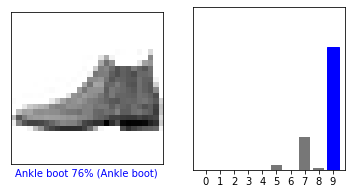

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

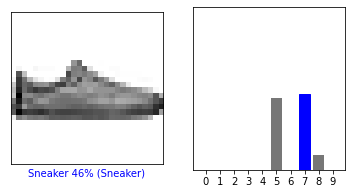

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

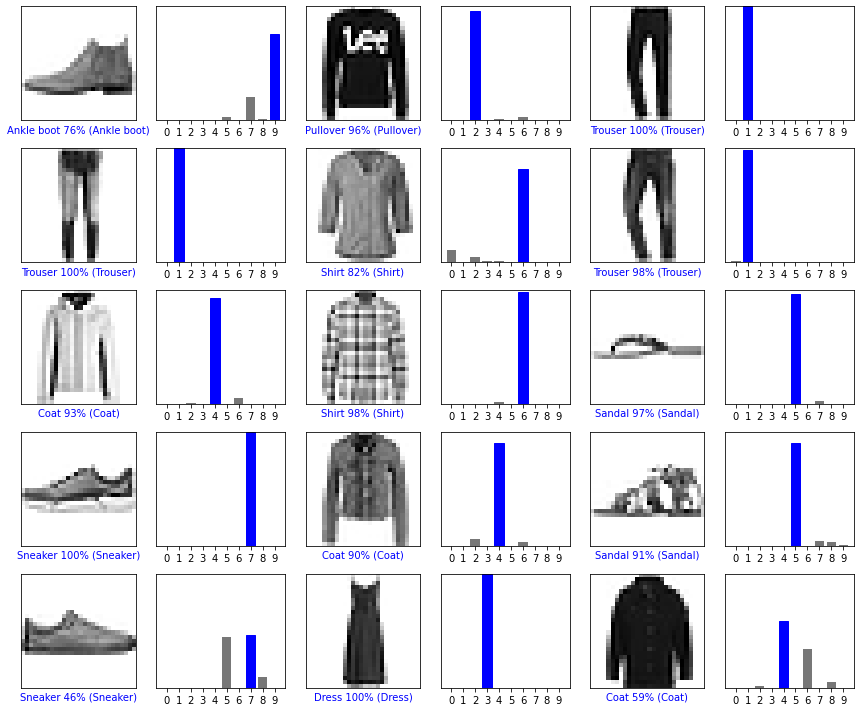

In [26]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Пример с обработкой текста

In [27]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [28]:
url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

datasets = tf.keras.utils.get_file("aclImbd_v1", url, untar=True, cache_dir='.', cache_subdir='')


84140032/84125825 [==============================] - 22s 0us/step


In [29]:
dataset_dir = 'D:/Data Science/Проекты/Metod_Goodreads/aclImdb'
os.listdir(os.path.normpath(dataset_dir))

['imdb.vocab', 'imdbEr.txt', 'README', 'test', 'train']

In [30]:
# содержание загруженных данных

train_dir = os.path.join(dataset_dir, 'train')
os.listdir(train_dir)

['labeledBow.feat',
 'neg',
 'pos',
 'unsupBow.feat',
 'urls_neg.txt',
 'urls_pos.txt',
 'urls_unsup.txt']

In [31]:
# пример отзыва

sample_file = os.path.join(train_dir, 'pos/1181_9.txt')
with open(sample_file) as f:
    print(f.read())

Rachel Griffiths writes and directs this award winning short film. A heartwarming story about coping with grief and cherishing the memory of those we've loved and lost. Although, only 15 minutes long, Griffiths manages to capture so much emotion and truth onto film in the short space of time. Bud Tingwell gives a touching performance as Will, a widower struggling to cope with his wife's death. Will is confronted by the harsh reality of loneliness and helplessness as he proceeds to take care of Ruth's pet cow, Tulip. The film displays the grief and responsibility one feels for those they have loved and lost. Good cinematography, great direction, and superbly acted. It will bring tears to all those who have lost a loved one, and survived.


In [34]:
# удалим папки
# которые нам не понадобятся больше

shutil.rmtree('D:/Data Science/Проекты/Metod_Goodreads/git_goodreads/aclImdb/train/unsup')

FileNotFoundError: [WinError 3] Системе не удается найти указанный путь: 'D:/Data Science/Проекты/Metod_Goodreads/git_goodreads/aclImdb/train/unsup'

In [36]:
# создаем набор для проверки

batch_size = 32
seed = 42

raw_train_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/train', 
    batch_size=batch_size, 
    validation_split=0.2, 
    subset='training', 
    seed=seed)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


Изначально данные разделены на набор для тренировки и набор для тестирования. Теперь мы дополнительно получим набор для проверки. То есть наши данные будут разделены на три набора.

In [37]:
# получим примеры отзывов
# вместе с категорией оценки

for text_batch, label_batch in raw_train_ds.take(1):
  for i in range(3):
    print("Review", text_batch.numpy()[i])
    print("Label", label_batch.numpy()[i])

Review b'"Pandemonium" is a horror movie spoof that comes off more stupid than funny. Believe me when I tell you, I love comedies. Especially comedy spoofs. "Airplane", "The Naked Gun" trilogy, "Blazing Saddles", "High Anxiety", and "Spaceballs" are some of my favorite comedies that spoof a particular genre. "Pandemonium" is not up there with those films. Most of the scenes in this movie had me sitting there in stunned silence because the movie wasn\'t all that funny. There are a few laughs in the film, but when you watch a comedy, you expect to laugh a lot more than a few times and that\'s all this film has going for it. Geez, "Scream" had more laughs than this film and that was more of a horror film. How bizarre is that?<br /><br />*1/2 (out of four)'
Label 0
Review b"David Mamet is a very interesting and a very un-equal director. His first movie 'House of Games' was the one I liked best, and it set a series of films with characters whose perspective of life changes as they get into 

In [38]:
# значение категорий

print("Label 0 corresponds to", raw_train_ds.class_names[0])
print("Label 1 corresponds to", raw_train_ds.class_names[1])

Label 0 corresponds to neg
Label 1 corresponds to pos


In [39]:
# данные для проверки

raw_val_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/train', 
    batch_size=batch_size, 
    validation_split=0.2, 
    subset='validation', 
    seed=seed)

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [40]:
# данные для тестирования

raw_test_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/test', 
    batch_size=batch_size)

Found 25000 files belonging to 2 classes.


### Подготовка данных

In [41]:
# переводим текст в нижний регистр
# удаляем лишние символы

def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)
  stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
  return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation),
                                  '')

In [42]:
max_features = 10000
sequence_length = 250

# слой для предварительной обработки текста

vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length
)

In [43]:
train_text = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

In [44]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

In [45]:
# пример обработки текста

text_batch, label_batch = next(iter(raw_train_ds))
first_review, first_label = text_batch[0], label_batch[0]
print("Review", first_review)
print("Label", raw_train_ds.class_names[first_label])
print("Vectorized review", vectorize_text(first_review, first_label))

Review tf.Tensor(b'Great movie - especially the music - Etta James - "At Last". This speaks volumes when you have finally found that special someone.', shape=(), dtype=string)
Label neg
Vectorized review (<tf.Tensor: shape=(1, 250), dtype=int64, numpy=
array([[  85,   17,  260,    2,  222,    1,  571,   31,  229,   11, 2421,
           1,   51,   22,   25,  404,  251,   12,  308,  282,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
       

In [46]:
# коды для слов
# 85 это код для great
# с которого начинается отзыв

print("1287 ---> ",vectorize_layer.get_vocabulary()[85])
print(" 313 ---> ",vectorize_layer.get_vocabulary()[17])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

1287 --->  great
 313 --->  movie
Vocabulary size: 10000


In [47]:
# обработка тренировочного
# проверочного и тестового наборов

train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

In [48]:
# дополнительные методы 
# повышения производительности обработки данных
# в памяти

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Создание модели

In [49]:
embedding_dim = 16

In [50]:
# задаем слои

model = tf.keras.Sequential([
    layers.Embedding(max_features + 1, embedding_dim),
    layers.Dropout(0.2),
    layers.GlobalAveragePooling1D(),
    layers.Dropout(0.2),
    layers.Dense(1)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160016    
_________________________________________________________________
dropout (Dropout)            (None, None, 16)          0         
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


In [51]:
# компилируем модель

model.compile(loss=losses.BinaryCrossentropy(from_logits=True),
optimizer='adam',
metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

### Обучение модели

In [52]:
# обучаем модель

epochs = 2
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/2
625/625 [==============================] - 68s 107ms/step - loss: 0.6622 - binary_accuracy: 0.6993 - val_loss: 0.6120 - val_binary_accuracy: 0.7748
Epoch 2/2
625/625 [==============================] - 3s 4ms/step - loss: 0.5462 - binary_accuracy: 0.8039 - val_loss: 0.4964 - val_binary_accuracy: 0.8234


### Оценка модели

In [53]:
loss, accuracy =  model.evaluate(test_ds)

print("Loss: ", loss)
print("Accurace: ", accuracy)

782/782 [==============================] - 255s 321ms/step - loss: 0.5021 - binary_accuracy: 0.8158
Loss:  0.5020954608917236
Accurace:  0.8158400058746338


In [54]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

Ниже приведены графики оценки модели

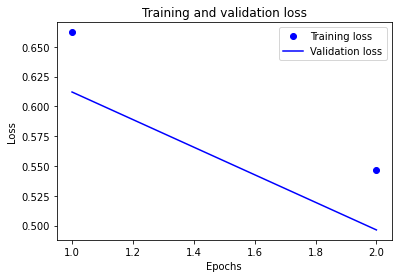

In [55]:
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

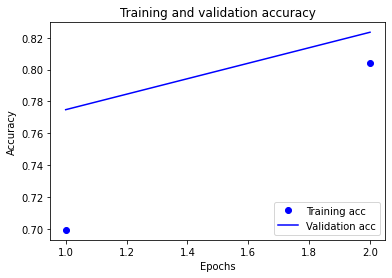

In [56]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [57]:
export_model = tf.keras.Sequential([
  vectorize_layer,
  model,
  layers.Activation('sigmoid')
])

export_model.compile(
    loss=losses.BinaryCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

loss, accuracy = export_model.evaluate(raw_test_ds)
print(accuracy)

782/782 [==============================] - 4s 5ms/step - loss: 0.5021 - accuracy: 0.8158
0.8158400058746338


In [58]:
examples = [
  "The movie was great!",
  "The movie was okay.",
  "The movie was terrible..."
]

export_model.predict(examples)

array([[0.56515664],
       [0.5303381 ],
       [0.51603884]], dtype=float32)

# Пример на регрессию

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [60]:
# получение данных

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(url, names=column_names, na_values='?', comment='\t',
sep=' ', skipinitialspace=True)

In [61]:
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [62]:
# удаляем пропуски

dataset = dataset.dropna()

In [63]:
# кодируем категориальные данные

dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [64]:
# делим данные на тренировочные и тестовые

train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

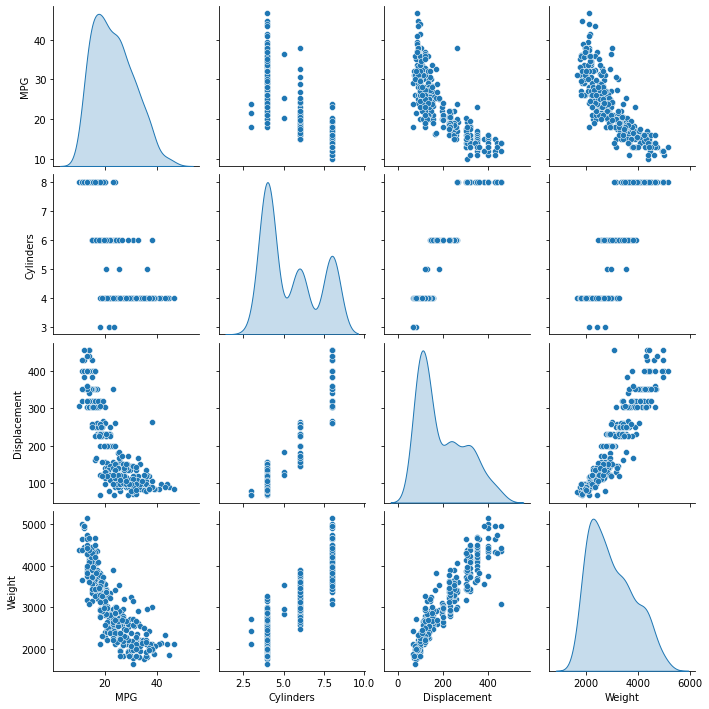

In [65]:
# посмотрим распределение
# и взаимосвязи наших признаков

sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

In [66]:
# выводит с учетом категории

train_dataset.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [67]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [68]:
# делим на признаки 
# и целевой признак

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

### Подготовка данных

In [69]:
# ниже показан пример кода
# для нормализации данных

normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))


In [70]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]

Normalized: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


### Создание модели

In [71]:
# нормализация

horsepower = np.array(train_features['Horsepower'])
horsepower_normalizer = preprocessing.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)

В том случае, если мы будем искать регрессию между целевым признаком и несколькими признаками, а ни одним как здесь, нормализацию надо применять ко всем признакам.

In [72]:
# создание слоев

horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [73]:
horsepower_model.predict(horsepower[:10])

array([[ 0.16209894],
       [ 0.09154905],
       [-0.29918882],
       [ 0.22722192],
       [ 0.20551425],
       [ 0.08069521],
       [ 0.24350266],
       [ 0.20551425],
       [ 0.05356064],
       [ 0.09154905]], dtype=float32)

In [74]:
# компиляция модели

horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

### Обучение модели

In [75]:
history = horsepower_model.fit(
    train_features['Horsepower'], train_labels,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

In [76]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.804988,4.166783,95
96,3.804411,4.192255,96
97,3.802319,4.202249,97
98,3.802693,4.189164,98
99,3.802615,4.184511,99


In [77]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

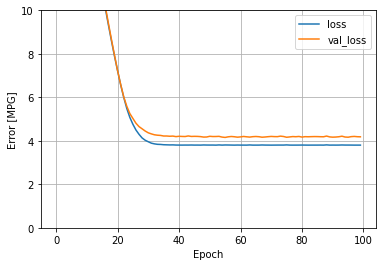

In [78]:
plot_loss(history)

In [79]:
test_results = {}

test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=0
)

### Прогнозы модели

In [80]:
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

In [81]:
def plot_horsepower(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

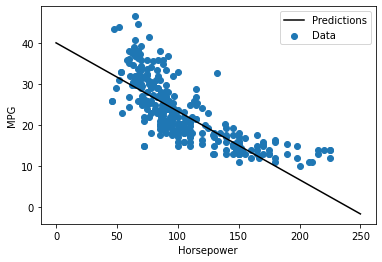

In [82]:
plot_horsepower(x,y)

### Обучение со скрытыми слоями

In [83]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [84]:
# для одного независимого признака

dnn_horsepower_model = build_and_compile_model(horsepower_normalizer)

In [85]:
dnn_horsepower_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [86]:
history = dnn_horsepower_model.fit(
    train_features['Horsepower'], train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

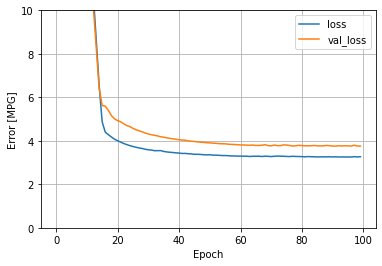

In [87]:
plot_loss(history)

In [88]:
# предсказание

x = tf.linspace(0.0, 250, 251)
y = dnn_horsepower_model.predict(x)

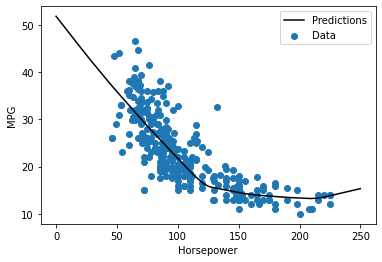

In [89]:
plot_horsepower(x, y)

Скрытые слои позволяют учитывать нелинейность, что мы и видим на графике.

In [90]:
test_results['dnn_horsepower_model'] = dnn_horsepower_model.evaluate(
    test_features['Horsepower'], test_labels,
    verbose=0)

In [91]:
# для всех признаков

dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 9)                 19        
_________________________________________________________________
dense_7 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [92]:
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

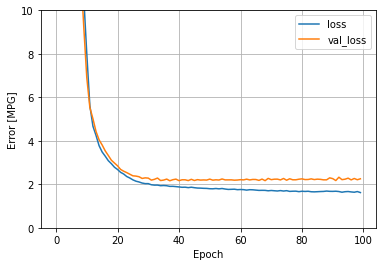

In [93]:
plot_loss(history)

In [94]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

### Инспектирование модели

In [95]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.647203
dnn_horsepower_model,2.955918
dnn_model,1.674773


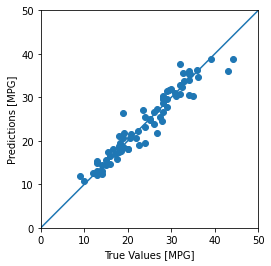

In [96]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

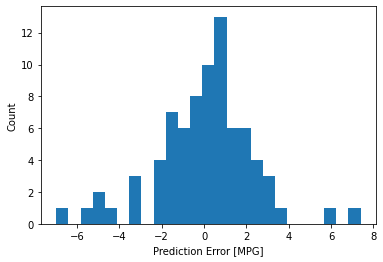

In [97]:
# оценка распределения ошибок

error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [98]:
# сохранение модели
dnn_model.save('dnn_model')

INFO:tensorflow:Assets written to: dnn_model\assets


# Данные Goodreads

Теперь наконец-то мы можем заняться нашими данными. 

In [99]:
data = pd.read_csv('D:/Data Science/Проекты/Metod_Goodreads/git_goodreads/gd_augmentation.csv', dtype = {'decade':'object','quarter':'object', 'tra_co':'object', 'multivolume':'object'}) 

In [100]:
db = data.copy()
db = db[['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count', 'len_title', 'polarity', 'subjectivity']]

In [101]:
db

,average_rating,num_pages,ratings_count,text_reviews_count,len_title,polarity,subjectivity
0,4.57,652,2095690,27591,39,-0.166667,0.166667
1,4.49,870,2153167,29221,42,0.000000,0.000000
2,4.42,352,6333,244,40,0.000000,0.000000
3,4.56,435,2339585,36325,41,0.000000,0.000000
4,4.78,2690,41428,164,34,0.000000,0.000000
...,...,...,...,...,...,...,...
10833,4.06,512,156,20,48,0.000000,0.000000
10834,4.08,635,783,56,27,0.700000,0.800000
10835,3.96,415,820,95,14,0.000000,0.000000
10836,3.72,434,769,139,11,-0.400000,0.600000


In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X = db.drop('average_rating', axis=1)
y = db['average_rating']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1) 

Вначале мы с помощью нейронной сети предскажем среднюю оценку по количеству страниц. Затем добавим оставшиеся признаки.

В последующих редакциях методички будут добавлены более продвинутые техники, в том числе и использование категориальных данных.

### Подготовка данных

In [105]:
aver_rat = np.array(X_train['num_pages'])

In [106]:
aver_rat_norm = preprocessing.Normalization(input_shape=[1,], axis=None)

In [107]:
aver_rat_norm.adapt(aver_rat)

In [108]:
aver_rat_norm

### Создание модели

In [109]:
# создаем слои

aver_model = tf.keras.Sequential([
    aver_rat_norm,
    layers.Dense(units=1)
])

aver_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_2 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [110]:
# компиляция

aver_model.compile(
    optimizer = tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

### Обучение модели

In [111]:
history = aver_model.fit(

    X_train['num_pages'], y_train,
    epochs=100,
    verbose=0,
    validation_split = 0.2

)

### Оценка результатов

In [112]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.224271,0.249137,95
96,0.228400,0.237104,96
97,0.229051,0.228798,97
98,0.226422,0.235776,98
99,0.228827,0.228829,99


## Обучение на всем наборе

### Подготовка данных

In [113]:
X = db.drop('average_rating', axis=1)
y = db['average_rating']

In [114]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, train_size=0.7, random_state=1) 

In [115]:
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(X_train1))

### Создание слоев

In [116]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

### Компиляция

In [117]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

### Обучение

In [118]:
history = linear_model.fit(
    X_train1, y_train1, 
    epochs=100,
    verbose=0,
    validation_split = 0.2)

In [119]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.247630,0.244800,95
96,0.257805,0.251743,96
97,0.246639,0.264865,97
98,0.247047,0.244276,98
99,0.249937,0.234161,99


### Сеть со скрытыми слоями

In [120]:
X = db.drop('average_rating', axis=1)
y = db['average_rating']

In [121]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, train_size=0.7, random_state=1) 

In [122]:
# зададим слои и
# компиляцию через функцию

def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [123]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_3 (Normalizati (None, 6)                 13        
_________________________________________________________________
dense_12 (Dense)             (None, 64)                448       
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 4,686
Trainable params: 4,673
Non-trainable params: 13
_________________________________________________________________


In [124]:
history = dnn_model.fit(
    X_train2, y_train2,
    validation_split=0.2,
    verbose=0, epochs=100)

In [125]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.211245,0.222325,95
96,0.209263,0.224750,96
97,0.209019,0.221405,97
98,0.209912,0.226880,98
99,0.209486,0.224494,99


In [126]:
# проверка на тестовом наборе

test_results['dnn_model'] = dnn_model.evaluate(X_test2, y_test2, verbose=0)

In [127]:
test_results['dnn_model']

0.217513307929039